In [ ]:
#Pymaceutical Challenge

In [18]:
# I SETUP

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#pd.set_option('display.max_rows', df.shape[0]+1)



In [79]:
# OBSERVATIONS (conclusions)
#Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

#1. Capomulin and ramicane have the lowest average tumor volume (40) within the 10 treatments. 
#We cannot infere that they are the best regimens from this observations since we have to  control
# the characterstics of the mice in theri population (Do these regimens have younger mice with lower weight?Do weight and age have an impact?)

#2. Capomulin and ramicane have the most number a of measurements (above 200).
#We cannot statsistical infere, from these sample, that the size of the sample impact better results (vs. the other regimens)

#3. There is a strong correlation that during the regimen, the tumor decreases.
#We have to check other variables (eat regimen, environment,etc)to see the causality between
#drug regimen and decrease in tumor volume


In [20]:
# II CLEAN DATA

#Before beginning the analysis, check the data for any mouse ID 
#with duplicate time points and remove any data associated with that mouse
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Checking the number of mice in the clean DataFrame.

#mouse_metadata.head()
#study_results.head()

study_results_sort= study_results.sort_values(by=["Mouse ID","Timepoint"])
study_results_sort

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
113,a203,0,45.000000,0
389,a203,5,48.508468,0
598,a203,10,51.852437,1
758,a203,15,52.777870,1
1018,a203,20,55.173336,1
...,...,...,...,...
1143,z969,25,63.145652,2
1407,z969,30,65.841013,3
1529,z969,35,69.176246,4
1730,z969,40,70.314904,4


In [21]:
srsg= study_results_sort.groupby(["Mouse ID","Timepoint"])
srsgII =srsg.count()
srsgII.loc[srsgII["Tumor Volume (mm3)"]>1]


Tumor Volume (mm3)  Metastatic Sites
Mouse ID Timepoint                                      
g989     0                           2                 2
         5                           2                 2
         10                          2                 2
         15                          2                 2
         20                          2                 2

In [22]:
drop_mice_g9890=study_results.loc[study_results["Mouse ID"] != "g989"]
drop_mice_g9890

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [23]:
# III MERGE & PREPARE INFO



In [24]:
# 1 Combine the data into a single dataset
df= pd.merge(mouse_metadata, drop_mice_g9890, how="left", on=["Mouse ID"])

In [25]:
# 2 Display the data table for preview
df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0.0,45.000000,0.0
1,k403,Ramicane,Male,21,16,5.0,38.825898,0.0
2,k403,Ramicane,Male,21,16,10.0,35.014271,1.0
3,k403,Ramicane,Male,21,16,15.0,34.223992,1.0
4,k403,Ramicane,Male,21,16,20.0,32.997729,1.0


In [26]:
# 3 number of observations
df["Mouse ID"].count()

1881

In [27]:
#  4 Checking the number of mice
lmid= df["Mouse ID"].unique()
len(lmid)

249

In [28]:
# extra: Checking the data through different lenses
a1=df.groupby(["Drug Regimen","Mouse ID"])
a11=a1[["Age_months","Weight (g)","Timepoint","Tumor Volume (mm3)"]].mean()
a11.head()

Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)
Drug Regimen Mouse ID                                                       
Capomulin    b128               9          22       22.5           41.963636
             b742               7          21       22.5           40.083699
             f966              16          17       10.0           36.505973
             g288               3          19       22.5           41.990097
             g316              22          22       22.5           44.613344

In [29]:
# IV GENERAL STATISTICS

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

drug_regimen_df =df.groupby(["Drug Regimen"])
drug_regimen_df[["Tumor Volume (mm3)"]].describe()

Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                   181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                  148.0  52.320930  6.622085  45.000000  46.894328   
Ramicane                  228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                  181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                 182.0  53.236507  6.966589  45.000000  47.337876   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     41.557809  45.000000  48.158209  
Ceftamin      51.776157  56.801438  68.923185  
Infubinol     51.820584  57.314444  72.226731  
Ketapril      53.698743  60.870951  78.567014  
Naftisol      52.509285  59.963034  76.668817  
Placebo       52.288934  59.916934  73.212939  
Propriva      50.446266  56.491585  72.455421  
Ramicane      40.673236  45.000000  47.622816  
Stelasyn      52.431737  58.719297  75.123690  
Zoniferol     51.818479  57.954259  73.324432

In [32]:
#V BAR CHART

# prepare data for barcharts
TM_DR=drug_regimen_df[["Tumor Volume (mm3)"]].count()
TM_DR



,Tumor Volume (mm3)
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


<AxesSubplot:xlabel='Drug Regimen'>

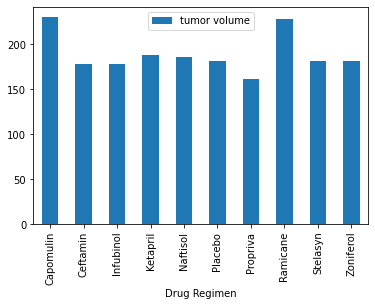

In [37]:
#PANDA PLOT
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
data={"Drug Regimen":["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"],"tumor volume":[230,178,178,188,186,181,161,228,181,182]}
data_panda = pd.DataFrame(data,columns=['Drug Regimen','tumor volume'])
data_panda.plot(x="Drug Regimen", y="tumor volume", kind= "bar")


<IPython.core.display.Javascript object>


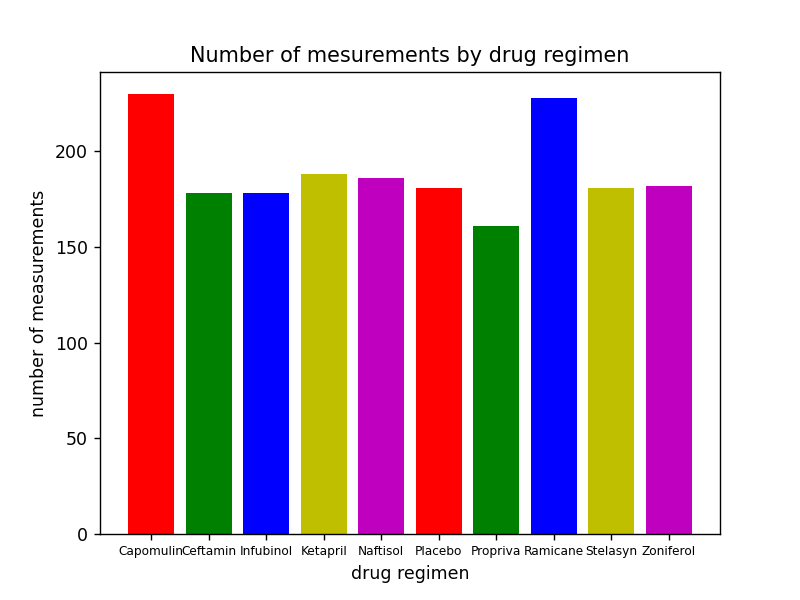

In [73]:
#matplotlib
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
%matplotlib notebook
xax=data_panda["Drug Regimen"] 
yay=data_panda["tumor volume"]

plt.bar(xax,yay, color=["r","g","b","y","m"], align="center")
plt.xlabel('drug regimen')
plt.ylabel('number of measurements')
plt.title("Number of mesurements by drug regimen")
plt.rcParams['xtick.labelsize']=7
#plt.rcParams['ytick.labelsize']=8
plt.show()

# We change the fontsize of minor ticks label 
#plt.tick_params(axis='both', which='major', labelsize=10)
#plt.tick_params(axis='both', which='minor', labelsize=8)


<IPython.core.display.Javascript object>


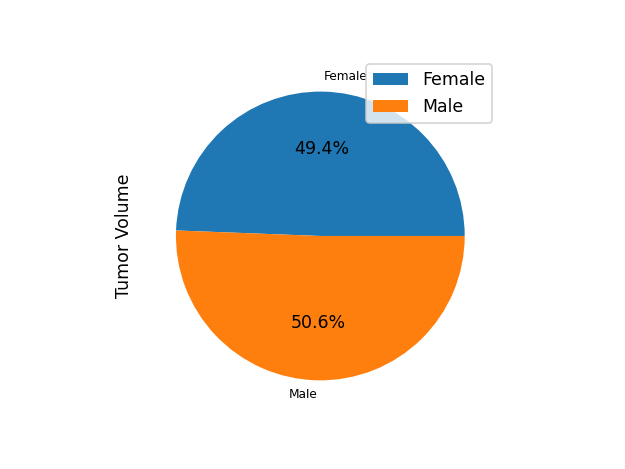

<AxesSubplot:ylabel='Tumor Volume'>

In [72]:
#panda pie
# Generate a pie plot showing the distribution of female versus male mice using pandas
df_gender={"Sex":["Female","Male"],"Tumor Volume":[935,958] }
gender_panda = pd.DataFrame(df_gender,columns=['Sex',"Tumor Volume"])
gender_panda.plot.pie(y="Tumor Volume",figsize=(4, 3), labels= ["Female","Male"],autopct='%1.1f%%')


<IPython.core.display.Javascript object>


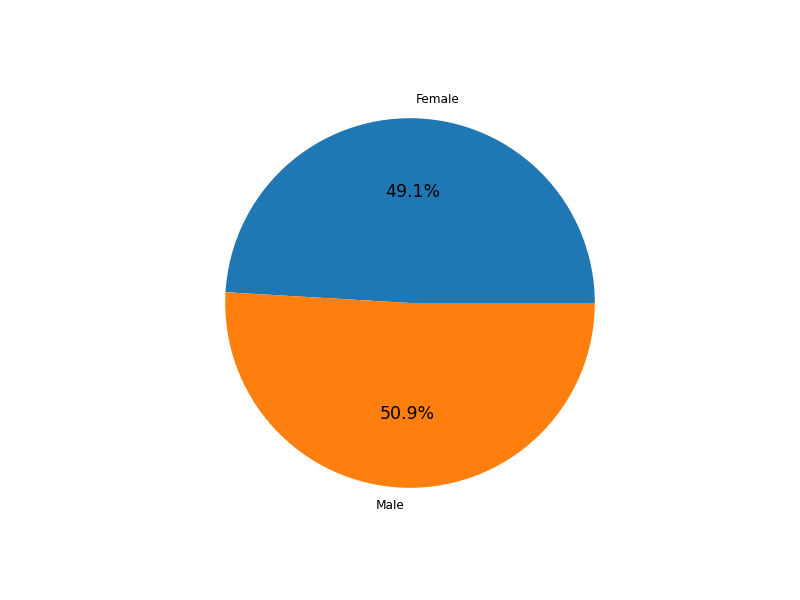

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
%matplotlib notebook
gender =df.groupby(["Sex"])
#gender["Tumor Volume (mm3)"].describe()
gender_count=gender["Drug Regimen"].count()
labels= ["Female","Male"]
plt.pie(gender_count,labels= labels,autopct='%1.1f%%')
plt.show()

In [58]:
gender_count

Sex
Female    923
Male      958
Name: Drug Regimen, dtype: int64

<IPython.core.display.Javascript object>


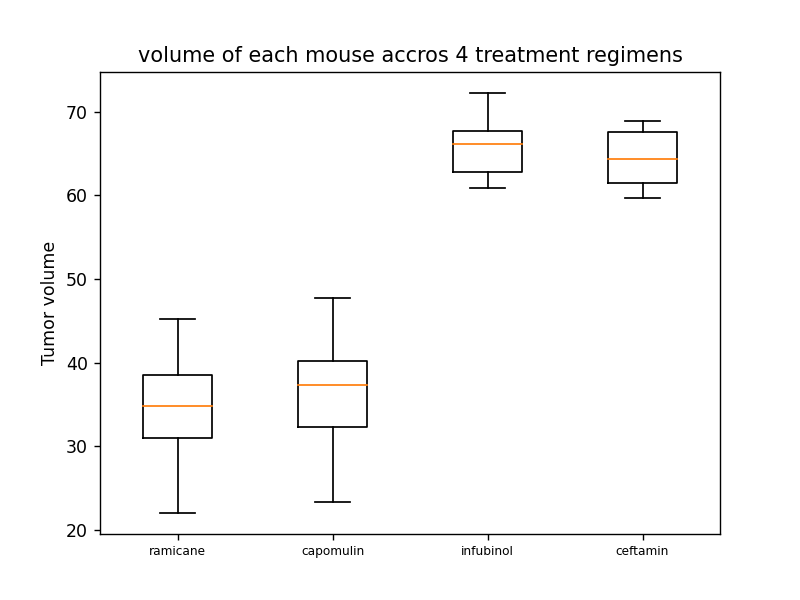

([<matplotlib.axis.XTick at 0x7fec721267c0>,
 [Text(1, 0, 'ramicane'),
  Text(2, 0, 'capomulin'),
  Text(3, 0, 'infubinol'),
  Text(4, 0, 'ceftamin')])

In [74]:
#quarters outliers boxplots
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#Lastpoint =45
final_timepoint= df.loc[(df["Timepoint"]==45)& (df["Drug Regimen"] =="Ramicane")]
final_timepointII= df.loc[(df["Timepoint"]==45)& (df["Drug Regimen"] =="Capomulin")]
final_timepointIII= df.loc[(df["Timepoint"]==45)& (df["Drug Regimen"] =="Infubinol")]
final_timepointIV= df.loc[(df["Timepoint"]==45)& (df["Drug Regimen"] =="Ceftamin")]

fptI =final_timepoint.append(final_timepointII)
fptII=fptI.append(final_timepointIII)
fptIII=fptII.append(final_timepointIV)
#fptIII[["Drug Regimen","Tumor Volume (mm3)"]]
#https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py

a=final_timepoint["Tumor Volume (mm3)"] #ramicane
b=final_timepointII["Tumor Volume (mm3)"] #capomulin
c=final_timepointIII["Tumor Volume (mm3)"] #infubinol
d=final_timepointIV["Tumor Volume (mm3)"]#ceftamin

datas=[a,b,c,d]

fig1, ax1 = plt.subplots()
ax1.set_title('volume of each mouse accros 4 treatment regimens')
ax1.set_ylabel('Tumor volume')
ax1.boxplot(datas)
plt.xticks([1, 2, 3,4], ['ramicane', 'capomulin', 'infubinol','ceftamin'])




In [60]:

#Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

#quartiles ramicane
quartiles_ramicane = final_timepoint.quantile([.25,.5,.75])
quartiles_ramicane

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0.25,7.75,17.00,45.0,30.981175,1.0
0.50,9.00,18.50,45.0,34.848627,1.0
0.75,11.50,21.25,45.0,38.508305,2.0


In [61]:
#quartiles capomulin
quartiles_capomulin = final_timepointII.quantile([.25,.5,.75])
quartiles_capomulin

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0.25,7.0,17.0,45.0,32.377357,1.0
0.50,16.0,20.0,45.0,37.311846,1.0
0.75,19.0,22.0,45.0,40.159220,2.0


In [62]:
#quartiles infubinol
quartiles_infubinol = final_timepointIII.quantile([.25,.5,.75])
quartiles_infubinol

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0.25,17.0,25.0,45.0,62.754451,1.0
0.50,20.0,26.0,45.0,66.083066,2.0
0.75,23.0,28.0,45.0,67.685569,3.0


In [64]:

#quartiles ceftamin
quartiles_ceftamin = final_timepointIV.quantile([.25,.5,.75])
quartiles_ceftamin

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0.25,6.0,26.0,45.0,61.433892,3.0
0.50,15.0,28.0,45.0,64.299830,3.0
0.75,20.0,28.0,45.0,67.527482,3.0


In [65]:
#Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.

mouse_ex= df.loc[(df["Mouse ID"]=="g316")& (df["Drug Regimen"] =="Capomulin")]
mouse_ex

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
351,g316,Capomulin,Female,22,22,0.0,45.000000,0.0
352,g316,Capomulin,Female,22,22,5.0,44.022752,0.0
353,g316,Capomulin,Female,22,22,10.0,44.502042,0.0
354,g316,Capomulin,Female,22,22,15.0,45.216743,0.0
355,g316,Capomulin,Female,22,22,20.0,45.933322,1.0
356,g316,Capomulin,Female,22,22,25.0,46.809225,1.0
357,g316,Capomulin,Female,22,22,30.0,44.221480,2.0
358,g316,Capomulin,Female,22,22,35.0,44.702833,2.0
359,g316,Capomulin,Female,22,22,40.0,45.565821,2.0
360,g316,Capomulin,Female,22,22,45.0,40.159220,2.0


<IPython.core.display.Javascript object>


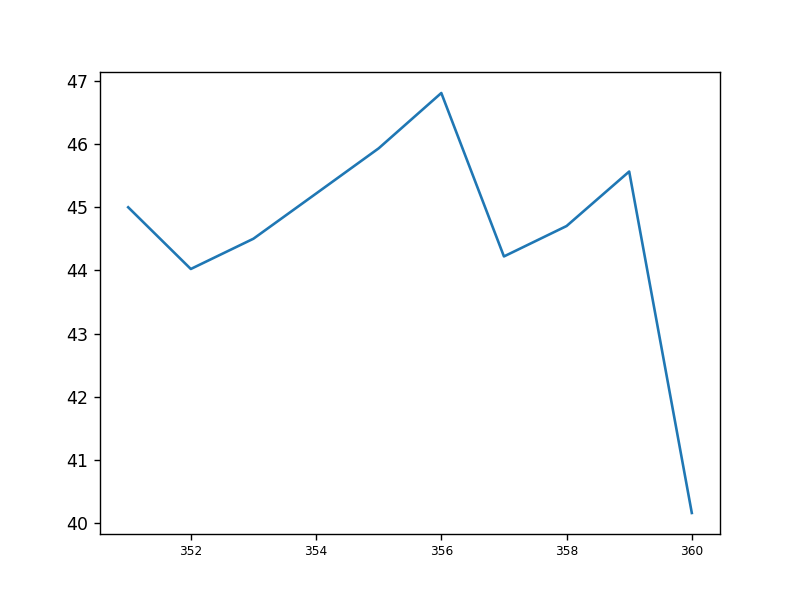

<AxesSubplot:>

In [78]:
%matplotlib notebook
tv= mouse_ex["Tumor Volume (mm3)"]
time=[0,5,15,20,25,30,35,40,45]
#tp=mouse_example["Timepoint"]
#tp_tv= mouse_example["Tumor Volume (mm3)"]
tv.plot()




In [67]:
#line and scaterplots
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

scatter_mouse= df.loc[df["Drug Regimen"] =="Capomulin"]
scatter_mouseI= scatter_mouse[["Drug Regimen","Timepoint","Tumor Volume (mm3)"]]
scatter_mice = scatter_mouseI.set_index('Drug Regimen')
scatter_mice.head()



,Timepoint,Tumor Volume (mm3)
Drug Regimen,,
Capomulin,0.0,45.000000
Capomulin,5.0,43.878496
Capomulin,10.0,37.614948
Capomulin,15.0,38.177232
Capomulin,20.0,36.866876


<IPython.core.display.Javascript object>


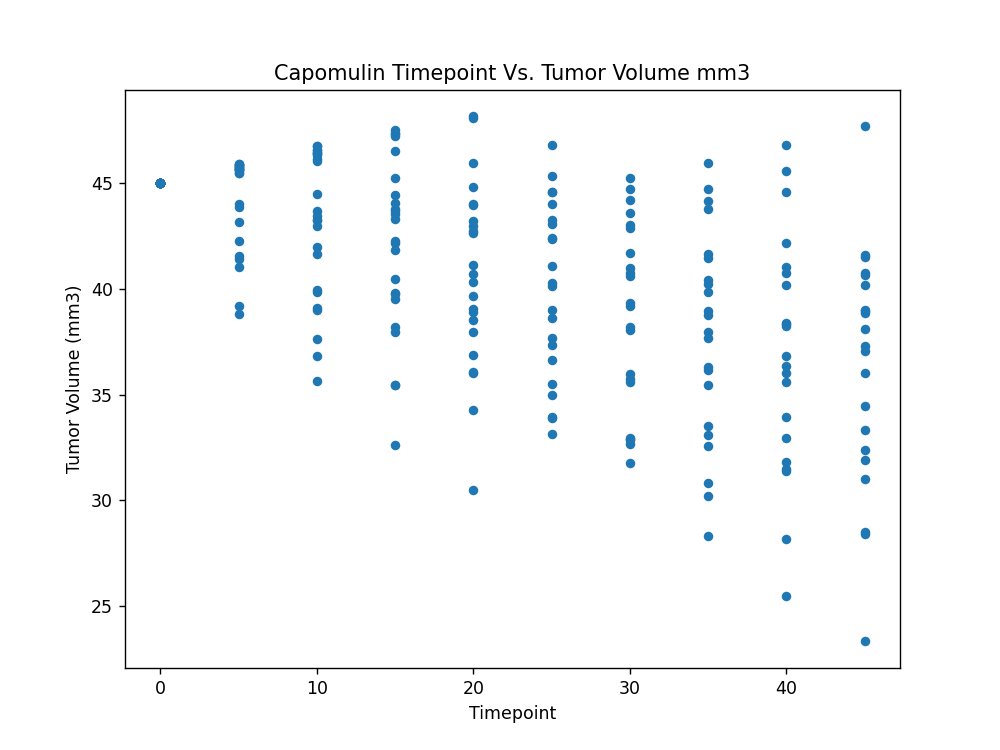

<AxesSubplot:title={'center':'Capomulin Timepoint Vs. Tumor Volume mm3'}, xlabel='Timepoint', ylabel='Tumor Volume (mm3)'>

In [70]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_mice.plot(kind="scatter", x="Timepoint", y="Tumor Volume (mm3)", title="Capomulin Timepoint Vs. Tumor Volume mm3")

In [68]:
#correlation and causation
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

cor_tm= scatter_mouse["Tumor Volume (mm3)"]
cor_we=scatter_mouse["Weight (g)"]
correlation = st.pearsonr(cor_tm,cor_we)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.53


<IPython.core.display.Javascript object>


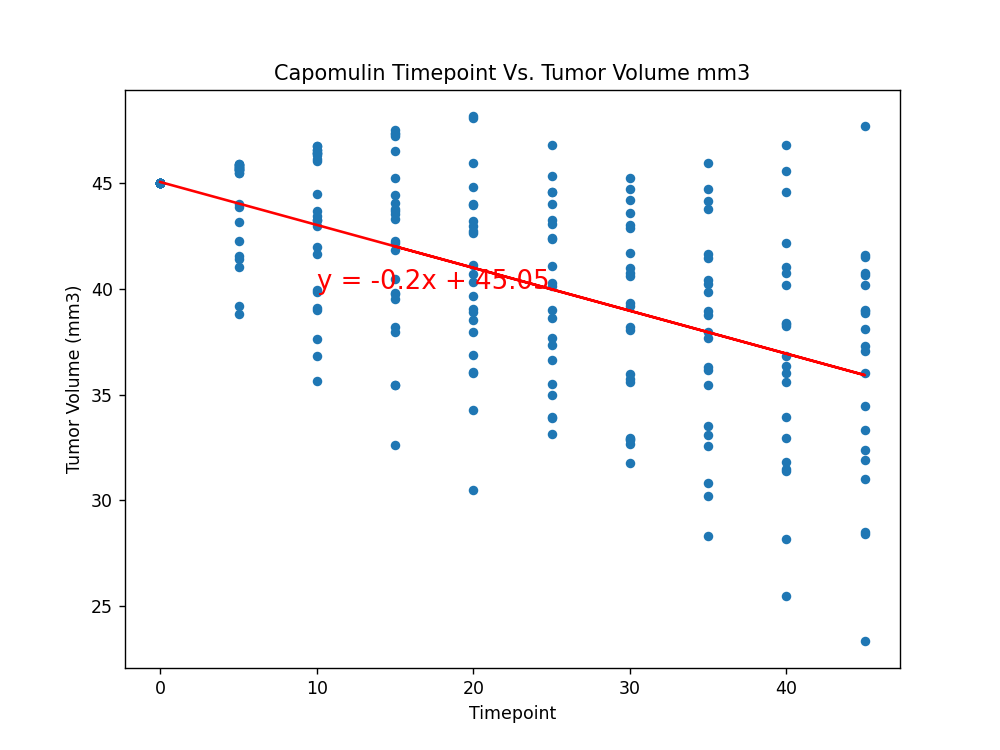

In [72]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#scatter_mice.plot(kind="scatter", x="Timepoint", y="Tumor Volume (mm3)", title="Capomulin Timepoint Vs. Tumor Volume mm3")
from scipy.stats import linregress
from sklearn import datasets
# Add the linear regression equation and line to plot
x_values = scatter_mouseI["Timepoint"]
y_values = scatter_mouseI['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
scatter_mice.plot(kind="scatter", x="Timepoint", y="Tumor Volume (mm3)", title="Capomulin Timepoint Vs. Tumor Volume mm3")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
